# Preprocessing

---
## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../')

from utils.duplicates import remove_rows, get_duplicates_to_delete, visualize_duplicates
from utils.rescale_image import resize_images_in_dataframe, display_random_images
from utils.normalization import process_images, insert_normalized_images
from utils.tensorflow_preprocessing import create_image_data_generator, prepare_image_dataset, show_batch
from utils.encoding import one_hot_encode, label_encode

2024-05-09 17:59:39.086115: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../data/processed/csv/df.csv')
duplicates = pd.read_csv('../data/processed/csv/duplicates.csv')

--- 
## Remove duplicates

2 DataFrames will be outputted:

| Variables   | Description                                                       |
|-------------|-------------------------------------------------------------------|
| `df_no_dup` | DataFrame with all but one duplicates of each style removed       |
| `df_no_ins` | DataFrame with misclassified images manually reviewed and removed |

### Automatically delete:
- For each duplicate group, delete all but one rows marked as "Duplicate" for each "Style".
- Outputs "df_no_dup".

In [3]:
duplicates_to_delete = get_duplicates_to_delete(duplicates)
df_no_dup = remove_rows(df, duplicates_to_delete)
df_no_dup

Identifying rows to delete...


100%|██████████| 5684/5684 [00:06<00:00, 861.91it/s] 


Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash,Group
0,tables/Eclectic/4029eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic,ee92726d43b64e93484c6de8b185a71697199d5d9cc5ac...,0
1,tables/Eclectic/4107eclectic-nightstands-and-b...,jpg,350,350,1.0,RGB,tables,Eclectic,b272078738d827a798da6525d672f585be14f1913d0598...,0
2,tables/Eclectic/3885eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic,bef22ce6c3bc1b78b11b431fec12c343e8c4ca70c2e078...,0
3,tables/Eclectic/4040eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic,a6736be66ccc5bb3cc99934cd31791ccd107e4c4e467ec...,0
4,tables/Eclectic/4171eclectic-coffee-tables.jpg,jpg,350,350,1.0,RGB,tables,Eclectic,bea77cb8c4b8c0f1c116a70c87458ff7cf1ade12de0358...,0
...,...,...,...,...,...,...,...,...,...,...
84791,beds/Asian/3166asian-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Asian,feab6fd6e104c00ba1d183f497df86e94b047bac94f9de...,0
84792,beds/Asian/7733asian-panel-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian,b3bb999fc1116aea1feeaf54998a6d38ca84e466ce37d3...,0
84793,beds/Asian/20802asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,fe6eac456c0e47ba93b193b191117aaa85d542fe93d0d2...,0
84794,beds/Asian/7850asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian,bbee9774f0016c8ac0f9f801c3e2a03d4f8aa3e9c61d93...,0


### Manually delete:
- Any rows marked as "Inspect" that belongs in the wrong "Class".
- Outputs "df_no_ins"

In [4]:
inspects = duplicates[duplicates['Duplicate_Type'] == 'Inspect']
inspects

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
90,41,Inspect,tables/Craftsman/28467craftsman-dressers.jpg,jpg,350,350,1.0,RGB,tables,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
91,41,Inspect,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
153,72,Inspect,tables/Industrial/37555industrial-entertainmen...,jpg,350,350,1.0,RGB,tables,Industrial,d6aa7d5a82ad6a0068540af5ad5596af9055d02b93f41f...
154,72,Inspect,dressers/Industrial/dresser3452345.jpg,jpg,350,350,1.0,RGB,dressers,Industrial,d6aa7d5a82ad6a0068540af5ad5596af9055d02b93f41f...
205,98,Inspect,dressers/Farmhouse/34120farmhouse-buffets-and-...,jpg,350,350,1.0,RGB,dressers,Farmhouse,8bfa4afe3c256aadd100341fc042955a70b5cb41947de6...
206,98,Inspect,tables/Farmhouse/28763farmhouse-console-tables...,jpg,350,350,1.0,RGB,tables,Farmhouse,8bfa4afe3c256aadd100341fc042955a70b5cb41947de6...
227,109,Inspect,tables/Modern/10363modern-nightstands-and-beds...,jpg,350,350,1.0,RGB,tables,Modern,b3980ddb3c66d39bd098f3a70c182c66c39ff068c99734...
228,109,Inspect,lamps/Contemporary/4023contemporary-table-lamp...,jpg,350,350,1.0,RGB,lamps,Contemporary,b3980ddb3c66d39bd098f3a70c182c66c39ff068c99734...
235,113,Inspect,dressers/Modern/2146modern-dressers.jpg,jpg,350,350,1.0,RGB,dressers,Modern,f3bbad52dccc13b9cc659725921158ce2dd594a5931146...
236,113,Inspect,tables/Modern/11484modern-dressers.jpg,jpg,350,350,1.0,RGB,tables,Modern,f3bbad52dccc13b9cc659725921158ce2dd594a5931146...


In [5]:
total_inspect_groups = inspects["Group"].nunique(dropna=False)

In [6]:
inspects_rows_to_delete = [91, 154, 205, 227, 235, 277, 280, 281, 287, 290, 299, 310, 318, 323, 325]

In [7]:
inspect_review = inspects.copy()
inspect_review["Duplicate_Type"] = "Keep"
inspect_review.loc[inspects_rows_to_delete, "Duplicate_Type"] = "DELETE"

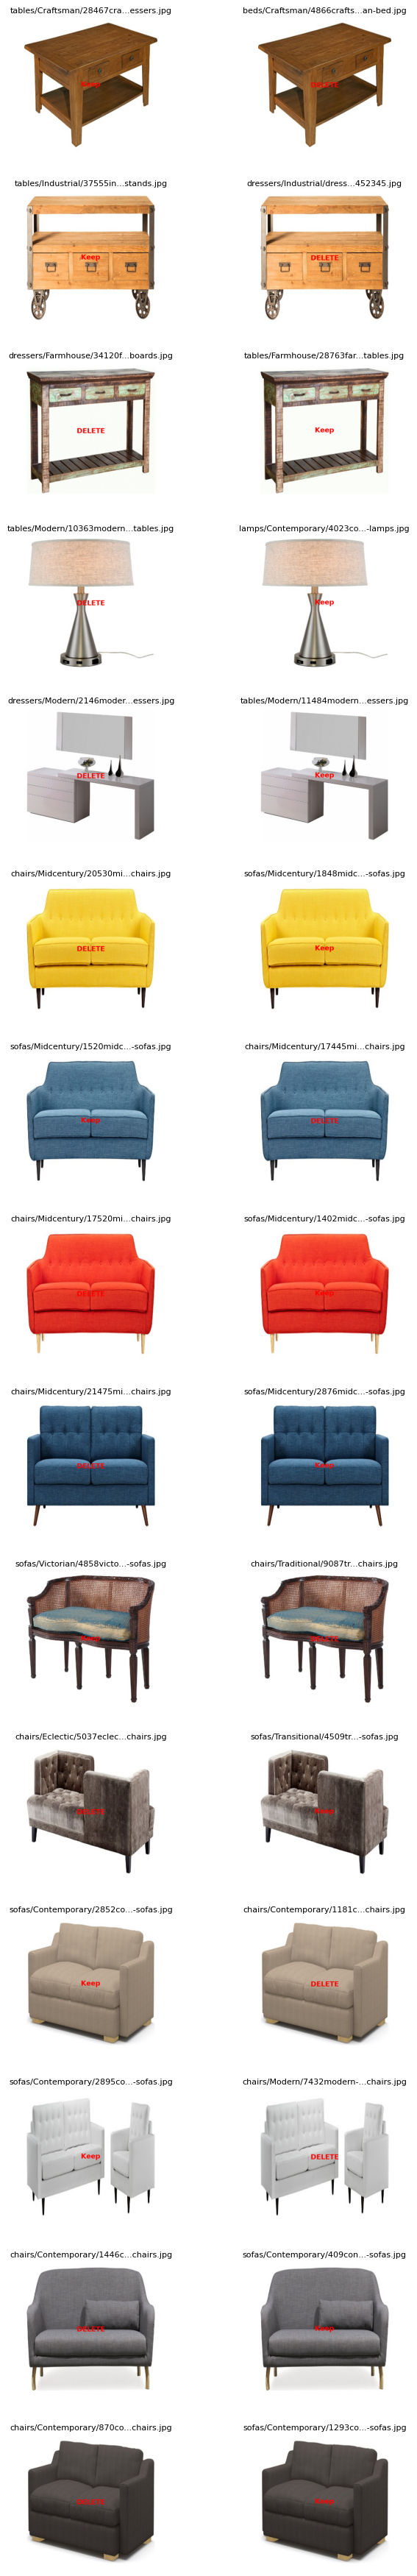

In [8]:
visualize_duplicates(inspect_review, total_inspect_groups)

In [9]:
inspects_to_delete = inspect_review[inspect_review["Duplicate_Type"] == "DELETE"]
inspects_to_delete

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
91,41,DELETE,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
154,72,DELETE,dressers/Industrial/dresser3452345.jpg,jpg,350,350,1.0,RGB,dressers,Industrial,d6aa7d5a82ad6a0068540af5ad5596af9055d02b93f41f...
205,98,DELETE,dressers/Farmhouse/34120farmhouse-buffets-and-...,jpg,350,350,1.0,RGB,dressers,Farmhouse,8bfa4afe3c256aadd100341fc042955a70b5cb41947de6...
227,109,DELETE,tables/Modern/10363modern-nightstands-and-beds...,jpg,350,350,1.0,RGB,tables,Modern,b3980ddb3c66d39bd098f3a70c182c66c39ff068c99734...
235,113,DELETE,dressers/Modern/2146modern-dressers.jpg,jpg,350,350,1.0,RGB,dressers,Modern,f3bbad52dccc13b9cc659725921158ce2dd594a5931146...
277,134,DELETE,chairs/Midcentury/20530midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury,bffef807c0403f5fc156c2a83457d7e8e81785a81e8090...
280,135,DELETE,chairs/Midcentury/17445midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury,baae7817f0542a5fc55a87e847abc7e8bac1d5a0c2852c...
281,136,DELETE,chairs/Midcentury/17520midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury,eaaa2d56b1556aaad50297bd17fb96a04abec0559fc441...
287,139,DELETE,chairs/Midcentury/21475midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury,ffff3a01a8003d5f856a95fe157e81ea8554c02aaec454...
290,140,DELETE,chairs/Traditional/9087traditional-indoor-chai...,jpg,350,350,1.0,RGB,chairs,Traditional,faba3f2bb540f09ae845da1cc0f7e03d22ff93f081e8e1...


In [10]:
df_no_ins = remove_rows(df, inspects_to_delete)
df_no_ins

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash,Group
0,tables/Eclectic/4029eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic,ee92726d43b64e93484c6de8b185a71697199d5d9cc5ac...,0
1,tables/Eclectic/4107eclectic-nightstands-and-b...,jpg,350,350,1.0,RGB,tables,Eclectic,b272078738d827a798da6525d672f585be14f1913d0598...,0
2,tables/Eclectic/3885eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic,bef22ce6c3bc1b78b11b431fec12c343e8c4ca70c2e078...,0
3,tables/Eclectic/4040eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic,a6736be66ccc5bb3cc99934cd31791ccd107e4c4e467ec...,0
4,tables/Eclectic/4171eclectic-coffee-tables.jpg,jpg,350,350,1.0,RGB,tables,Eclectic,bea77cb8c4b8c0f1c116a70c87458ff7cf1ade12de0358...,0
...,...,...,...,...,...,...,...,...,...,...
90064,beds/Asian/3166asian-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Asian,feab6fd6e104c00ba1d183f497df86e94b047bac94f9de...,0
90065,beds/Asian/7733asian-panel-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian,b3bb999fc1116aea1feeaf54998a6d38ca84e466ce37d3...,0
90066,beds/Asian/20802asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,fe6eac456c0e47ba93b193b191117aaa85d542fe93d0d2...,0
90067,beds/Asian/7850asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian,bbee9774f0016c8ac0f9f801c3e2a03d4f8aa3e9c61d93...,0


---
## Split (train, validation, test)

This part is complicated since there are 2 starting DataFrames (duplicates cleaned / inspects cleaned), and 2 target classes (Class / Style). 
Please refer to this table for the variables after splitting.

#### Duplicates cleaned
| Train                  | Validation           | Test                  | Description   |
|------------------------|----------------------|-----------------------|---------------|
| `no_dup_train_X`       | `no_dup_val_X`       | `no_dup_test_X`       | Data features |
| `no_dup_train_Y_class` | `no_dup_val_Y_class` | `no_dup_test_Y_class` | Target class  |
| `no_dup_train_Y_style` | `no_dup_val_Y_style` | `no_dup_test_Y_style` | Target style  |

#### Manual inspection cleaned
| Train                  | Validation           | Test                  | Description   |
|------------------------|----------------------|-----------------------|---------------|
| `no_ins_train_X`       | `no_ins_val_X`       | `no_ins_test_X`       | Data features |
| `no_ins_train_Y_class` | `no_ins_val_Y_class` | `no_ins_test_Y_class` | Target class  |
| `no_ins_train_Y_style` | `no_ins_val_Y_style` | `no_ins_test_Y_style` | Target style  |


### Prepare target and training

In [11]:
# df_no_dup
df_no_dup_target_class = df_no_dup[["Class"]].copy()
df_no_dup_target_style = df_no_dup[["Style"]].copy()

# df_no_ins
df_no_ins_target_class = df_no_ins[["Class"]].copy()
df_no_ins_target_style = df_no_ins[["Style"]].copy()

In [12]:
# Currently dropping all but "Path", since the values of all the other columns ("Type", "Width", "Height"...) is the same
columns_to_keep = ["Path"] # Change later if needed
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]

df_no_dup_train = df_no_dup.drop(columns=columns_to_drop, axis=1)
df_no_ins_train = df_no_ins.drop(columns=columns_to_drop, axis=1)

### Splitting

In [13]:
# df_no_dup
no_dup_train_X, no_dup_test_X, no_dup_train_Y_class, no_dup_test_Y_class, no_dup_train_Y_style, no_dup_test_Y_style = train_test_split(
    df_no_dup_train,
    df_no_dup_target_class,
    df_no_dup_target_style,
    test_size=0.2,
    random_state=42
)
no_dup_train_X, no_dup_val_X, no_dup_train_Y_class, no_dup_val_Y_class, no_dup_train_Y_style, no_dup_val_Y_style = train_test_split(
    no_dup_train_X,
    no_dup_train_Y_class,
    no_dup_train_Y_style,
    test_size=0.25,
    random_state=42
)

# df_no_ins
no_ins_train_X, no_ins_test_X, no_ins_train_Y_class, no_ins_test_Y_class, no_ins_train_Y_style, no_ins_test_Y_style = train_test_split(
    df_no_ins_train,
    df_no_ins_target_class,
    df_no_ins_target_style,
    test_size=0.2,
    random_state=42
)
no_ins_train_X, no_ins_val_X, no_ins_train_Y_class, no_ins_val_Y_class, no_ins_train_Y_style, no_ins_val_Y_style = train_test_split(
    no_ins_train_X,
    no_ins_train_Y_class,
    no_ins_train_Y_style,
    test_size=0.25,
    random_state=42
)

Note: please refer to the tables under "Split (train, validation, test)" for easier understanding

---
## Rescaling & Normalization
Note: Using Tensorflow for quick normalization and rescaling. In 'utils/tensorflow_preprocessing.py' file, there is a functions to normalize and rescale the each image in the dataset.

In [14]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.16.1'

In [15]:
base_path = '../data/raw/Furniture_Data'

dup_train_datagen = create_image_data_generator()
image_paths = no_dup_train_X['Path'].tolist()
dup_train_generator = prepare_image_dataset(image_paths, 256, 256, 32, dup_train_datagen, base_path)

In [18]:
dup_val_datagen = create_image_data_generator()
image_paths = no_dup_train_X['Path'].tolist()
dup_val_generator = prepare_image_dataset(image_paths, 256, 256, 32, dup_val_datagen, base_path)

In [19]:
dup_test_datagen = create_image_data_generator()
image_paths = no_dup_train_X['Path'].tolist()
dup_test_generator = prepare_image_dataset(image_paths, 256, 256, 32, dup_test_datagen, base_path)

In [20]:
ins_train_datagen = create_image_data_generator()
image_paths = no_dup_train_X['Path'].tolist()
ins_train_generator = prepare_image_dataset(image_paths, 256, 256, 32, ins_train_datagen, base_path)

In [21]:
ins_val_datagen = create_image_data_generator()
image_paths = no_dup_train_X['Path'].tolist()
ins_val_generator = prepare_image_dataset(image_paths, 256, 256, 32, ins_val_datagen, base_path)

In [22]:
ins_test_datagen = create_image_data_generator()
image_paths = no_dup_train_X['Path'].tolist()
ins_test_generator = prepare_image_dataset(image_paths, 256, 256, 32, ins_test_datagen, base_path)

---
### Testing code to check if the images are clearly normalized (Can delete after checking)

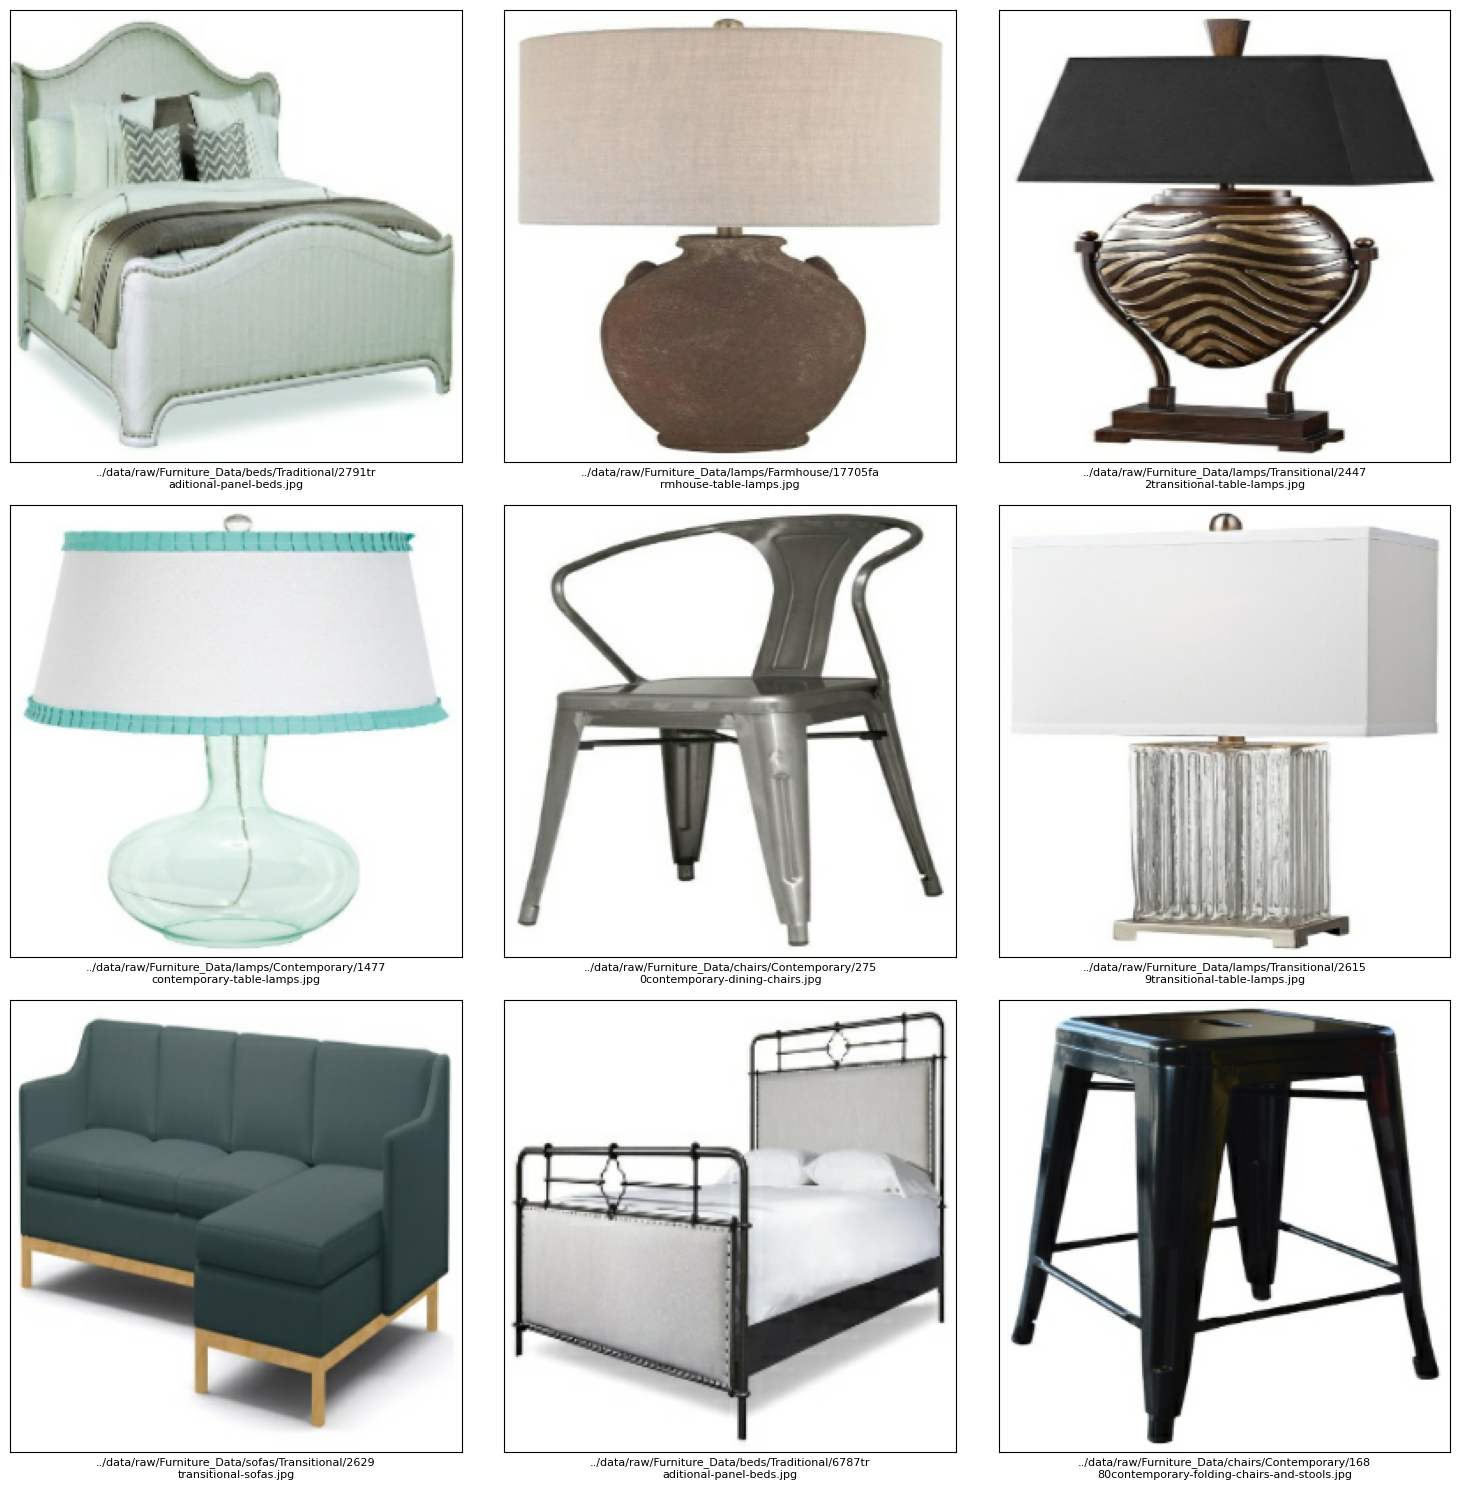

2024-05-09 18:00:08.582316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
# Visualize the first batch in dup_train_generator
for image_batch, path_batch in dup_train_generator.take(1):
    show_batch(image_batch.numpy(), path_batch.numpy().astype(str))

---
## Augmentation

---
## Encoding

In [23]:
# One-Hot Encoding
no_dup_train_Y_style = one_hot_encode(no_dup_train_Y_style, 'Style')
no_dup_test_Y_style = one_hot_encode(no_dup_test_Y_style, 'Style')
no_dup_val_Y_style = one_hot_encode(no_dup_val_Y_style, 'Style')

no_ins_train_Y_style = one_hot_encode(no_ins_train_Y_style, 'Style')
no_ins_test_Y_style = one_hot_encode(no_ins_test_Y_style, 'Style')
no_ins_val_Y_style = one_hot_encode(no_ins_val_Y_style, 'Style')

# Label Encoding
no_dup_train_Y_class = label_encode(no_dup_train_Y_class, 'Class')
no_dup_test_Y_class = label_encode(no_dup_test_Y_class, 'Class')
no_dup_val_Y_class = label_encode(no_dup_val_Y_class, 'Class')

no_ins_train_Y_class = label_encode(no_ins_train_Y_class, 'Class')
no_ins_test_Y_class = label_encode(no_ins_test_Y_class, 'Class')
no_ins_val_Y_class = label_encode(no_ins_val_Y_class, 'Class')

In [24]:
no_dup_train_Y_style.head()

,Style_Asian,Style_Beach,Style_Contemporary,Style_Craftsman,Style_Eclectic,Style_Farmhouse,Style_Industrial,Style_Mediterranean,Style_Midcentury,Style_Modern,Style_Rustic,Style_Scandinavian,Style_Southwestern,Style_Traditional,Style_Transitional,Style_Tropical,Style_Victorian
80771,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
34378,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
22228,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
45133,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68761,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
no_dup_train_Y_class.head()

,Class,Encoded_Class
80771,beds,0
34378,lamps,3
22228,lamps,3
45133,lamps,3
68761,chairs,1
